<div class="usecase-title">Projected Venue Growth</div>

<div class="usecase-authors"><b>Authored by: </b> Daniel D'Amore</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, Machine  Learning / Data Wrangling}</div>
</div>

### <div class="usecase-section-header">Scenario</div>

As an someone living in Melbourne, I want to know about the growth of melbourne and as someone who loves music i also want to know how music venues will grow.

* What suburbs contain the most venues
* Whats the projected growth for the next 20 years based on population

At the end of this use case you will:

- Gain an understanding of possible venue growth
- Learn about the projected population growth
- Gain an understanding of Geocoding
- Learn about the function of API's
- Understand the necessity of data processing

# Limitations and Purpose

* This notebook performs exploratory data analysis of Melbourne Venues against population to determine the projected growth of music venues from 2022 to 2041

* Population isn't the only factor in venue growth and this case covers an estimate based purely on population. It is only for an estimate and shouldnt be treated as an exact projection

# Calling in API keys for use

In [ ]:
import pandas as pd
#Calling in the required APIkeys
path = 'C:/Users/ddamo/Desktop/3rd Evoleon/MOP-Code/env.txt'
envar = open(path,'r')
APIKEY = envar.read()
path = 'C:/Users/ddamo/Desktop/3rd Evoleon/MOP-Code/envG.txt'
envarG = open(path,'r')
APIKEYG = envarG.read()



# Creating Function to retrieve datasets

In [263]:
import pandas as pd
import requests
base_url= 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'

#Function to fetch data from city of melbourne based on parameters input
def fetch_data(base_url, dataset,api_key, num_records=99, offset= 0):
    all_records = [] 
    if dataset == popdata:
        filter = '&refine=age%3ATotal%20population'
    else:
        filter = ""

    max_offset = 300 # Maximum number of requests
    while True:
        # maximum limit check
        if offset > max_offset:
            break
# Create API request URL
        filters = f'{dataset}/records?limit={num_records}&offset={offset}{filter}'
        url = f' {base_url}{filters}&api_key={api_key}'
        
        # Start request
        try:
            result = requests.get(url, timeout=10)
            result. raise_for_status()
            records = result.json().get('results')
        except requests.exceptions.RequestException as e:
            raise Exception(f"API request failed: {e}")
        if records is None:
            break
        
        all_records.extend(records)
        if len(records) < num_records:
            break
            
        offset += num_records
        
        
        
    df = pd.DataFrame(all_records)
    return df

# Fetching both data sets and doing preprocessing

In [272]:
#Running fetch function for both data sets
popdata= 'city-of-melbourne-population-forecasts-by-small-area-2020-2040'
musicdata= 'live-music-venues'
df = fetch_data(base_url,popdata,APIKEY)
pop =pd.DataFrame()
df2 = fetch_data(base_url,musicdata,APIKEY)

#Separating the data to take only wanted columns
pop["Area"]= df['geography']
pop['Year']= df['year']
pop['Population']= df['value']
pd.set_option('display.max_rows',20 ) 
music = pd.DataFrame()
music['Name'] = df2['venue_name']
music['Address'] = df2['venue_address']
music['Type'] = df2['space_type']
music['Latitude'] = df2['lat']
music['Longitude']= df2['lon']

display(music) 
pop




,Name,Address,Type,Latitude,Longitude
0,Fad Gallery,"Gnd & Flr1, 14 Corrs Lane, Melbourne, 3000",Bar,-37.811235,144.968335
1,Penny Blue,"2 Driver Lane, Melbourne, 3000",Bar,-37.812821,144.962989
2,Vodka Temple,"Ground, 160-162 Lygon Street, Carlton, 3053",Nightclub,-37.803452,144.966638
3,Union Electric,"13 Heffernan Lane, Melbourne, 3000",Bar,-37.811773,144.966689
4,Three Crowns Hotel,"361-365 Victoria Street, West Melbourne, 3003",Hotel,-37.805288,144.949490
5,Seamstress Restaurant and Bar,"113 Lonsdale Street, Melbourne, 3000",Bar,-37.810462,144.968957
6,European Bier Café,"120 Exhibition Street, Melbourne, 3000",bar,-37.812853,144.971104
7,Arbory Bar and Eatery,"2 Flinders Walk, Melbourne, 3000",Bar,-37.818910,144.966793
8,Touche Hombre,"237 Lonsdale Street, Melbourne, 3000",Bar,-37.811502,144.965440
9,AIM (Australian Institute of Music),"Gnd & Levels 1 -3, 120 King Street, Melbourne,...",Recording,-37.817262,144.956225


,Area,Year,Population
0,City of Melbourne,2023,158123
1,City of Melbourne,2024,166822
2,City of Melbourne,2027,202366
3,City of Melbourne,2031,241391
4,City of Melbourne,2034,265178
5,City of Melbourne,2036,278957
6,City of Melbourne,2041,308190
7,Carlton,2022,17629
8,Carlton,2029,24142
9,Carlton,2033,28540


# Using Google's Geocoding to turn the latitude and longitude of Music Venues into a suburb to better correlate with population

In [273]:
#Importing Googles's Geocoding 
from geopy.geocoders import GoogleV3
#Function that returns suburb based on provided lat/lon using Google's Geocoding API
def get_suburb_name(api_key, lat, lon):
    
    #Authenticate Your key and initialise Geocoding API
    geolocator = GoogleV3(api_key=api_key)

    #Catches errors
    try:
        location = geolocator.reverse((lat, lon), language='en')
        suburb = None
        #Searches address components for locaility, if its there it takes that and inputs in suburb
        for component in location.raw['address_components']:
            if 'locality' in component['types']:
                suburb = component['long_name']
                break
        #Returns suburb once its ran through it all
        return suburb
    #Catches errors
    except Exception as e:
        print(f"Error: {e}")
        return None
    
#Calling the function to get suburb names based on lat,lon for all rows
music['Suburb'] = music.apply(lambda row: get_suburb_name(APIKEYG, row['Latitude'], row['Longitude']), axis=1)

music

,Name,Address,Type,Latitude,Longitude,Suburb
0,Fad Gallery,"Gnd & Flr1, 14 Corrs Lane, Melbourne, 3000",Bar,-37.811235,144.968335,Melbourne
1,Penny Blue,"2 Driver Lane, Melbourne, 3000",Bar,-37.812821,144.962989,Melbourne
2,Vodka Temple,"Ground, 160-162 Lygon Street, Carlton, 3053",Nightclub,-37.803452,144.966638,Carlton
3,Union Electric,"13 Heffernan Lane, Melbourne, 3000",Bar,-37.811773,144.966689,Melbourne
4,Three Crowns Hotel,"361-365 Victoria Street, West Melbourne, 3003",Hotel,-37.805288,144.949490,West Melbourne
5,Seamstress Restaurant and Bar,"113 Lonsdale Street, Melbourne, 3000",Bar,-37.810462,144.968957,Melbourne
6,European Bier Café,"120 Exhibition Street, Melbourne, 3000",bar,-37.812853,144.971104,Melbourne
7,Arbory Bar and Eatery,"2 Flinders Walk, Melbourne, 3000",Bar,-37.818910,144.966793,Melbourne
8,Touche Hombre,"237 Lonsdale Street, Melbourne, 3000",Bar,-37.811502,144.965440,Melbourne
9,AIM (Australian Institute of Music),"Gnd & Levels 1 -3, 120 King Street, Melbourne,...",Recording,-37.817262,144.956225,Melbourne


# Gathering a count for how many Venues are in each suburb

In [199]:
#Creating list containing each suburb
suburb_counts = {
    "Melbourne": 0,
    "North Melbourne": 0,
    "Southbank": 0,
    "South Yarra": 0,
    "Carlton": 0,
    "Docklands": 0,
    "East Melbourne": 0,
    "West Melbourne": 0,
    "Parkville": 0,
    "Kensington": 0,
    "Other": 0,  
    "City of Melbourne": 0
}
#Getting a venue count for each suburb as well as a total (City of Melbourne)
for index, row in music.iterrows():
    suburb = row["Suburb"]
    suburb_counts["City of Melbourne"] += 1
    if suburb in ["Southbank", "South Wharf"]:
        suburb_counts["Southbank"] += 1
    elif suburb in suburb_counts:
        suburb_counts[suburb] += 1
    else:
        suburb_counts["Other"] += 1

# Removing 2021 as music venue data is from 2022 making 2021 irrelevant, Combining similar areas for convience 

In [274]:

popsorted = pop.sort_values(by=['Area', 'Year'])


#Removing 2021 from df as its unwanted
mask = (popsorted['Year'] == "2021")
popf = popsorted[~mask]
#print(filtered_data)

#Combining similar areas for better correlation 
popf.loc[:,'Area'] = popf['Area'].replace({'Melbourne (CBD)': 'Melbourne', 'Melbourne (Remainder)': 'Melbourne'})
popf.loc[:,'Area'] = popf['Area'].replace({'West Melbourne (Industrial)': 'West Melbourne', 'West Melbourne (Residential)': 'West Melbourne'})
popf = popf.groupby(['Year', 'Area'])['Population'].sum().reset_index()

#Resorting data
popf = popf.sort_values(by=['Area','Year'])



#Creating a separate data frame containing only year 2022 as the baseline since music venues were counted in 2022
Two = popf[popf['Year'] == "2022"]
print(Two)
print(suburb_counts)



    Year               Area  Population
0   2022            Carlton       17629
1   2022  City of Melbourne      156573
2   2022          Docklands       16222
3   2022     East Melbourne        5091
4   2022         Kensington       11117
5   2022          Melbourne       47782
6   2022    North Melbourne       15938
7   2022          Parkville        7923
8   2022     Port Melbourne          10
9   2022        South Yarra        3785
10  2022          Southbank       22999
11  2022     West Melbourne        8076
{'Melbourne': 147, 'North Melbourne': 8, 'Southbank': 32, 'South Yarra': 2, 'Carlton': 14, 'Docklands': 10, 'East Melbourne': 3, 'West Melbourne': 4, 'Parkville': 4, 'Kensington': 2, 'Other': 1, 'City of Melbourne': 227}


# Creating a Dataframe containing only 2022 and checking data

In [275]:
#Creating a separate data frame containing only year 2022 as the baseline since music venues were counted in 2022
Two = popf[popf['Year'] == "2022"]
print(Two)
print(suburb_counts)


    Year               Area  Population
0   2022            Carlton       17629
1   2022  City of Melbourne      156573
2   2022          Docklands       16222
3   2022     East Melbourne        5091
4   2022         Kensington       11117
5   2022          Melbourne       47782
6   2022    North Melbourne       15938
7   2022          Parkville        7923
8   2022     Port Melbourne          10
9   2022        South Yarra        3785
10  2022          Southbank       22999
11  2022     West Melbourne        8076
{'Melbourne': 147, 'North Melbourne': 8, 'Southbank': 32, 'South Yarra': 2, 'Carlton': 14, 'Docklands': 10, 'East Melbourne': 3, 'West Melbourne': 4, 'Parkville': 4, 'Kensington': 2, 'Other': 1, 'City of Melbourne': 227}


# Creating an average population per venue for each area

In [277]:
#Getting the population count per venue in each area and overall (CIty of Melbourne) for 2022. Making sure to handle cases where venues for area are 0
import numpy as np
Two.loc[:, 'Pop per venue'] = Two.apply(lambda row: row['Population'] / suburb_counts.get(row['Area'], 1) if suburb_counts.get(row['Area'], 0) != 0 else np.nan, axis=1)

print(Two)
print(popf)

    Year               Area  Population  Pop per venue
0   2022            Carlton       17629    1259.214286
1   2022  City of Melbourne      156573     689.748899
2   2022          Docklands       16222    1622.200000
3   2022     East Melbourne        5091    1697.000000
4   2022         Kensington       11117    5558.500000
5   2022          Melbourne       47782     325.047619
6   2022    North Melbourne       15938    1992.250000
7   2022          Parkville        7923    1980.750000
8   2022     Port Melbourne          10            NaN
9   2022        South Yarra        3785    1892.500000
10  2022          Southbank       22999     718.718750
11  2022     West Melbourne        8076    2019.000000
     Year            Area  Population
0    2022         Carlton       17629
12   2023         Carlton       17840
24   2024         Carlton       18729
36   2025         Carlton       20041
48   2026         Carlton       20743
60   2027         Carlton       21679
72   2028         C

# Applying the 2022 Population per venue to the main dataframe containing 2022-2041 to get project venue numbers in each area based on annual population growth

In [278]:
#Applying pop per venue to years 2023-2041 to get a predicted number of venues in each area based on predicted population
popf['Projected Venue count'] = popf.apply(lambda row: row['Population'] / Two.set_index('Area').loc[row['Area'], 'Pop per venue'], axis=1)

print(popf)

     Year            Area  Population  Projected Venue count
0    2022         Carlton       17629              14.000000
12   2023         Carlton       17840              14.167565
24   2024         Carlton       18729              14.873561
36   2025         Carlton       20041              15.915480
48   2026         Carlton       20743              16.472971
60   2027         Carlton       21679              17.216291
72   2028         Carlton       22836              18.135118
84   2029         Carlton       24142              19.172273
96   2030         Carlton       25414              20.182427
108  2031         Carlton       26375              20.945601
..    ...             ...         ...                    ...
131  2032  West Melbourne       13191               6.533432
143  2033  West Melbourne       13657               6.764240
155  2034  West Melbourne       14250               7.057949
167  2035  West Melbourne       14820               7.340267
179  2036  West Melbourn

# Graphing the data to provide a visual analysis of the venue projection

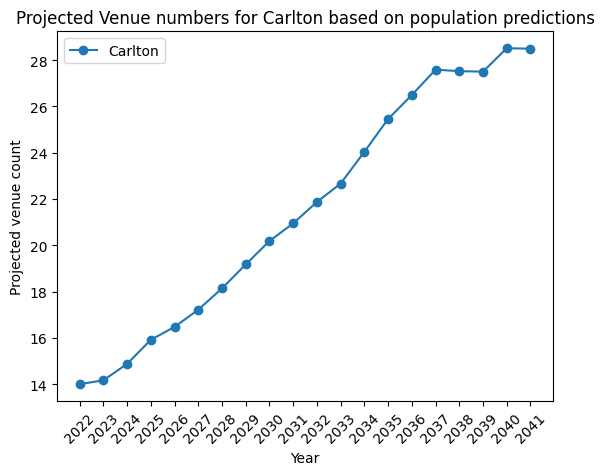

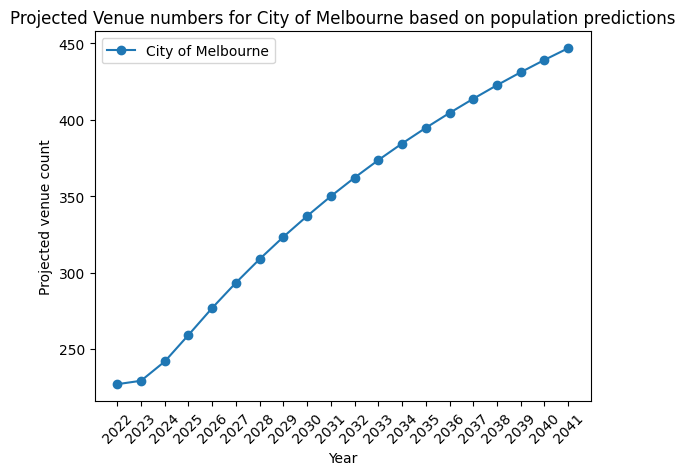

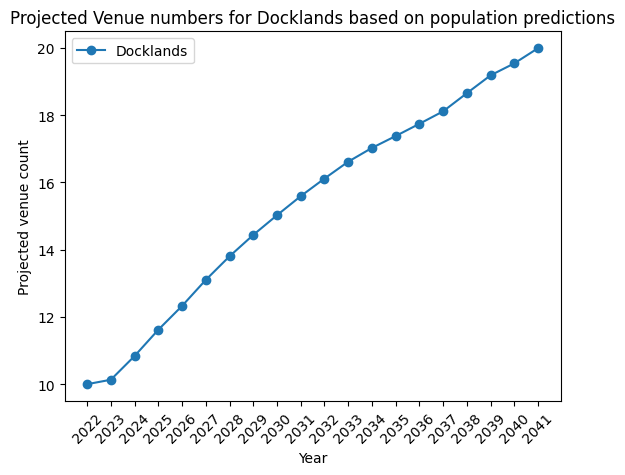

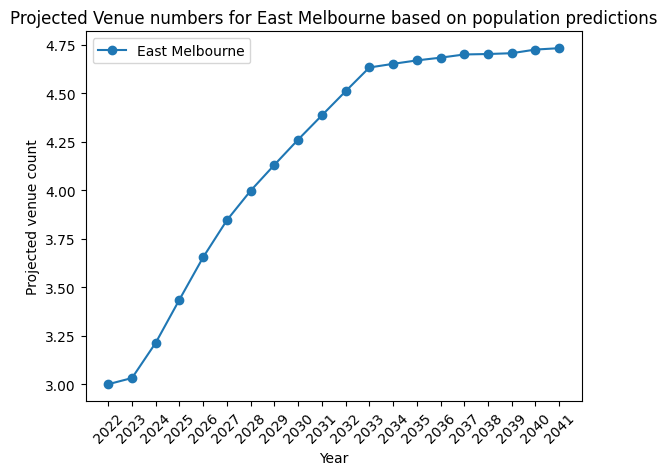

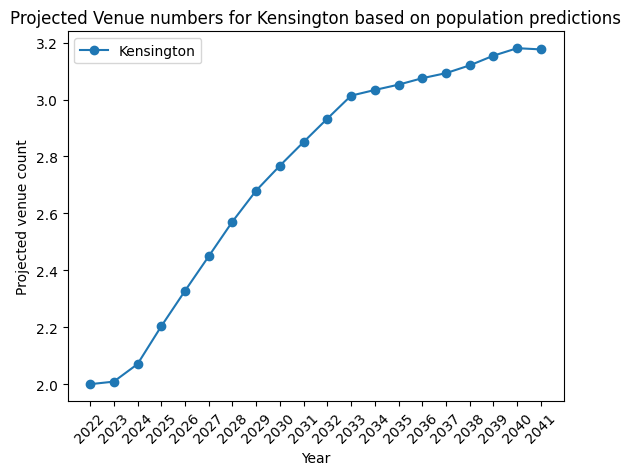

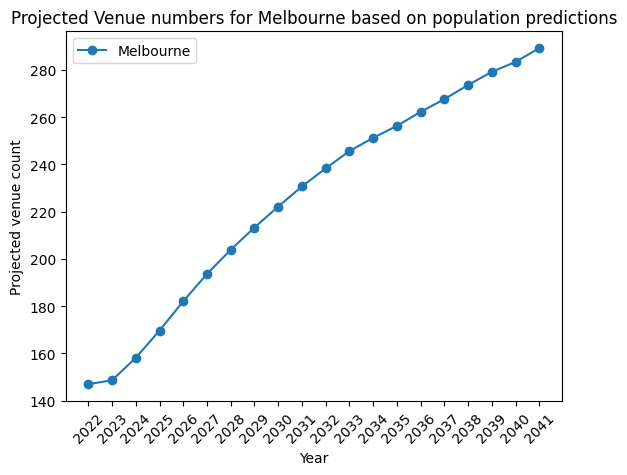

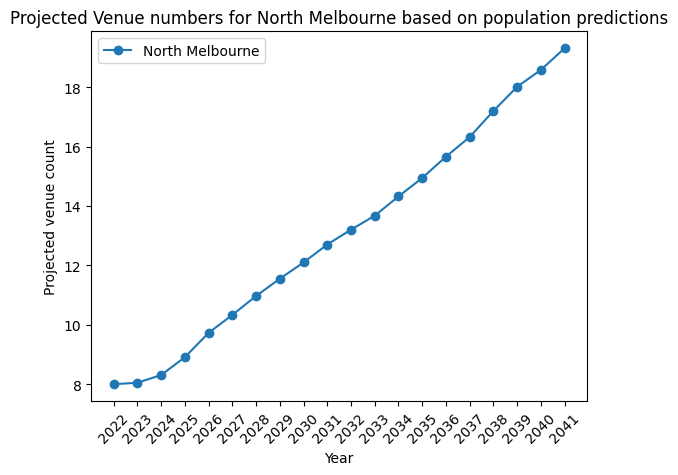

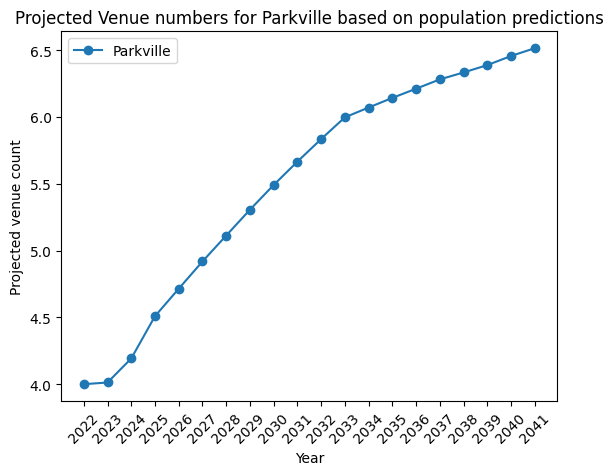

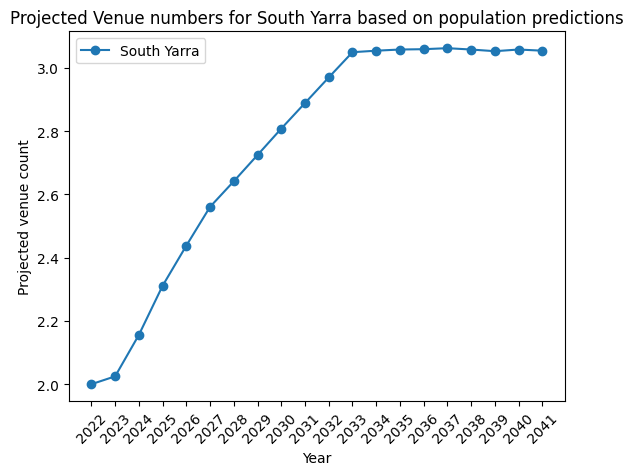

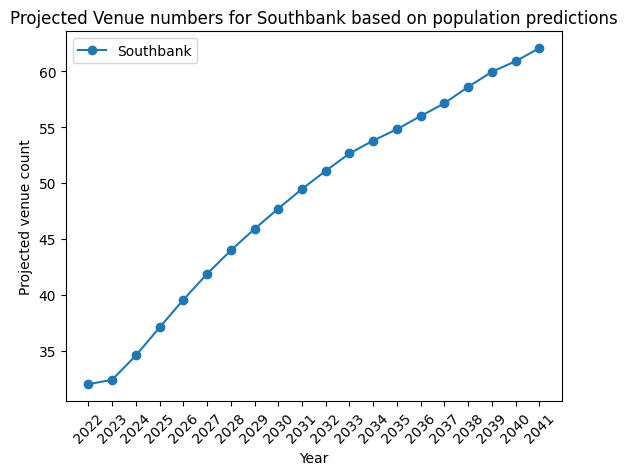

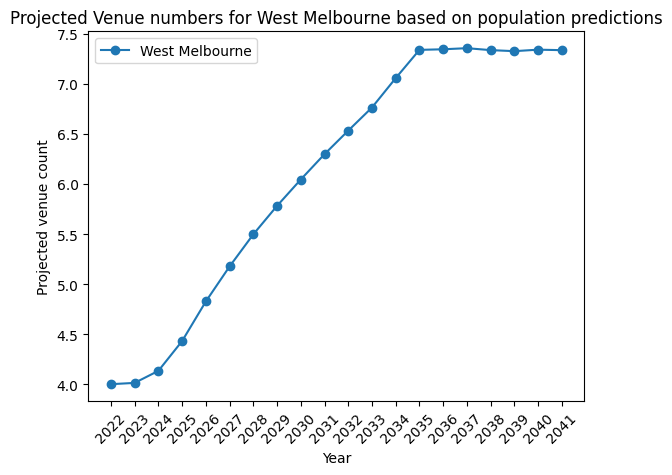

In [279]:
import matplotlib.pyplot as plt

areas = popf['Area'].unique()
for area in areas:

    area_data = popf[popf['Area'] == area]
    
    if not area_data['Projected Venue count'].isna().all() and not (area_data['Projected Venue count'] == 0).all():
    # Create a new subplot for each area
        fig, ax = plt.subplots()

    
        ax.plot(area_data['Year'], area_data['Projected Venue count'], marker='o', label=area)

        
        ax.set_xlabel('Year')
        ax.set_ylabel('Projected venue count')
        ax.set_title(f'Projected Venue numbers for {area} based on population predictions')
        plt.xticks(rotation=45)

        ax.legend()


    plt.show()

Notes:
    City of Melbourne acts as a total number for the whole city of melbourne

# Conclusion

* Having projected the growth of venues against population. The projection of music venues is set to continue its primary growth within the suburb of melbourne

* Through inspection, we can deduce areas with potentially limited venue growth such as South Yarra, Kensington and Parksville
* The projected growth in venues is based solely on one of a mirad of factors and shouldn't be referred to as definitive

# Potential further analysis

 Someone with more time could consider extending this to display a map of melbourne listing all venue locations as of 2022 and further use this data to obtain predictions for where the music venues in future years are likely to be located